# Predicting heart disease using machine learning model 
this notebook looks into using various Python-based machine learning and data science libraries in an attempts to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

we will take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?
## 2. Data


The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      * 1: serum = LDL + HDL + .2 * triglycerides
      * 2: above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
      * 0: Nothing to note
      * 1: ST-T Wave abnormality
         * can range from mild symptoms to severe problems
         * signals non-normal heart beat
      * 2: Possible or definite left ventricular hypertrophy
         * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
      * 0: Upsloping: better heart rate with excercise (uncommon)
      * 1: Flatsloping: minimal change (typical healthy heart)
      * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
      * colored vessel means the doctor can see the blood passing through
      * the more blood movement the better (no clots)
13. thal - thalium stress result
      * 1,3: normal
      * 6: fixed defect: used to be defect but ok now
      * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [41]:
# Import all the tools we need

# Regular EDA and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score




## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, columns)


(303, 14)

## Data Exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
value_counts = df['target'].value_counts()

[Text(0, 0, 'heart disease'), Text(1, 0, 'No heart disease')]

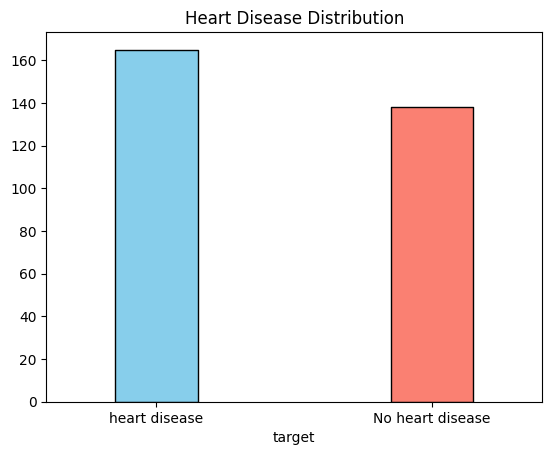

In [6]:
value_counts = df['target'].value_counts()
# Create a bar plot with custom bar shapes
fig, ax = plt.subplots()
bar_width = 0.3
# Change the shape of the bars (here, using a hexagon shape)
ax = value_counts.plot(kind='bar', rot=0, color=('skyblue', 'salmon'), edgecolor='black', width=bar_width, linewidth=1, capstyle='round', joinstyle='round')
ax.set_title('Heart Disease Distribution')
# Change the labels if needed
new_labels = {'0': 'No heart disease', '1': 'heart disease'}
ax.set_xticklabels([new_labels[label.get_text()] for label in ax.get_xticklabels()])


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Heatmap of Null Values')

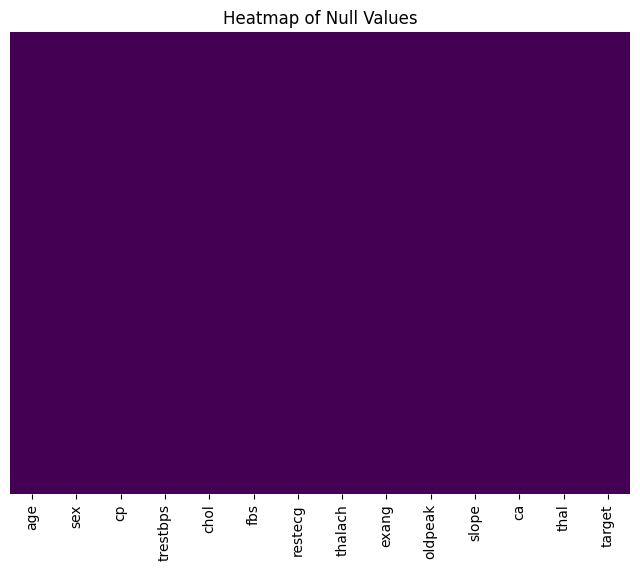

In [8]:
null_values = df.isnull()
# Using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(null_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap of Null Values')


In [9]:
null_count_df = null_values.sum().reset_index()
null_count_df.columns = ['Column', 'Null Count']

# Display the null count DataFrame
print("Null Count DataFrame:")
print(null_count_df)

Null Count DataFrame:
      Column  Null Count
0        age           0
1        sex           0
2         cp           0
3   trestbps           0
4       chol           0
5        fbs           0
6    restecg           0
7    thalach           0
8      exang           0
9    oldpeak           0
10     slope           0
11        ca           0
12      thal           0
13    target           0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Finding patterns 
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


Text(0.5, 1.0, 'Heart disease frequency for sex')

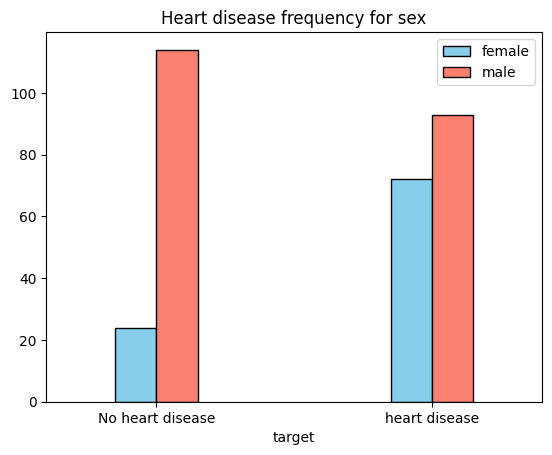

In [12]:
# visualize it makes it much more easer
first_pattern = pd.crosstab(df['target'], df['sex'])
ax = first_pattern.plot(kind='bar', rot=0, color=('skyblue', 'salmon'), edgecolor='black', width=bar_width, linewidth=1, capstyle='round', joinstyle='round')
bar_width = 0.3
new_labels = {'0': 'No heart disease', '1': 'heart disease'}
ax.legend(["female", 'male'])
ax.set_xticklabels([new_labels[label.get_text()] for label in ax.get_xticklabels()])
ax.set_title('Heart disease frequency for sex')


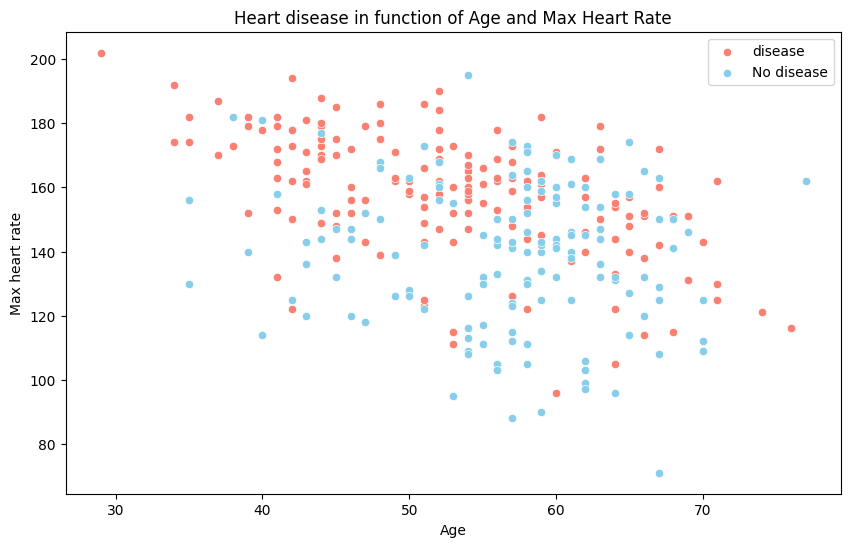

In [13]:
Heart_disease = df[df['target'] == 1]
No_heart_disease = df[df['target'] == 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Heart_disease['age'],y=Heart_disease['thalach'], color='salmon')
sns.scatterplot(x=No_heart_disease['age'],y=No_heart_disease['thalach'], color='skyblue')
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['disease', 'No disease'])


3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
# Finding the correlation between the cp and target
pd.crosstab(df['cp'], df['target'])



target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'Heart disease frequency for chest pain')

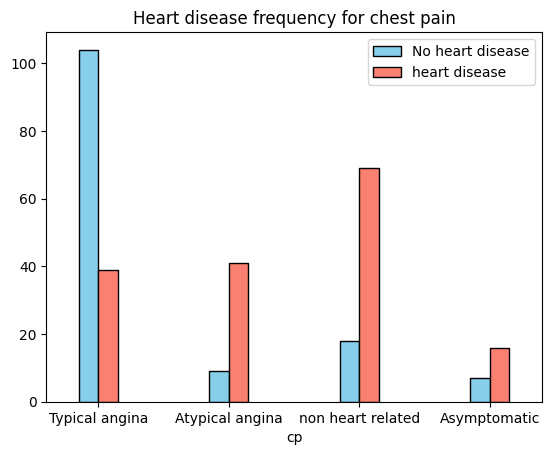

In [15]:
# visualize it to make it more easy
chest_pain = pd.crosstab(df['cp'], df['target'])
ax = chest_pain.plot(kind='bar', rot=0, color=('skyblue', 'salmon'), edgecolor='black', width=bar_width, linewidth=1, capstyle='round', joinstyle='round')
bar_width = 0.3
new_labels = {'0': 'Typical angina', '1': 'Atypical angina', '2':'non heart related', '3': 'Asymptomatic'}
ax.legend(["No heart disease", 'heart disease'])
ax.set_xticklabels([new_labels[label.get_text()] for label in ax.get_xticklabels()])
ax.set_title('Heart disease frequency for chest pain')

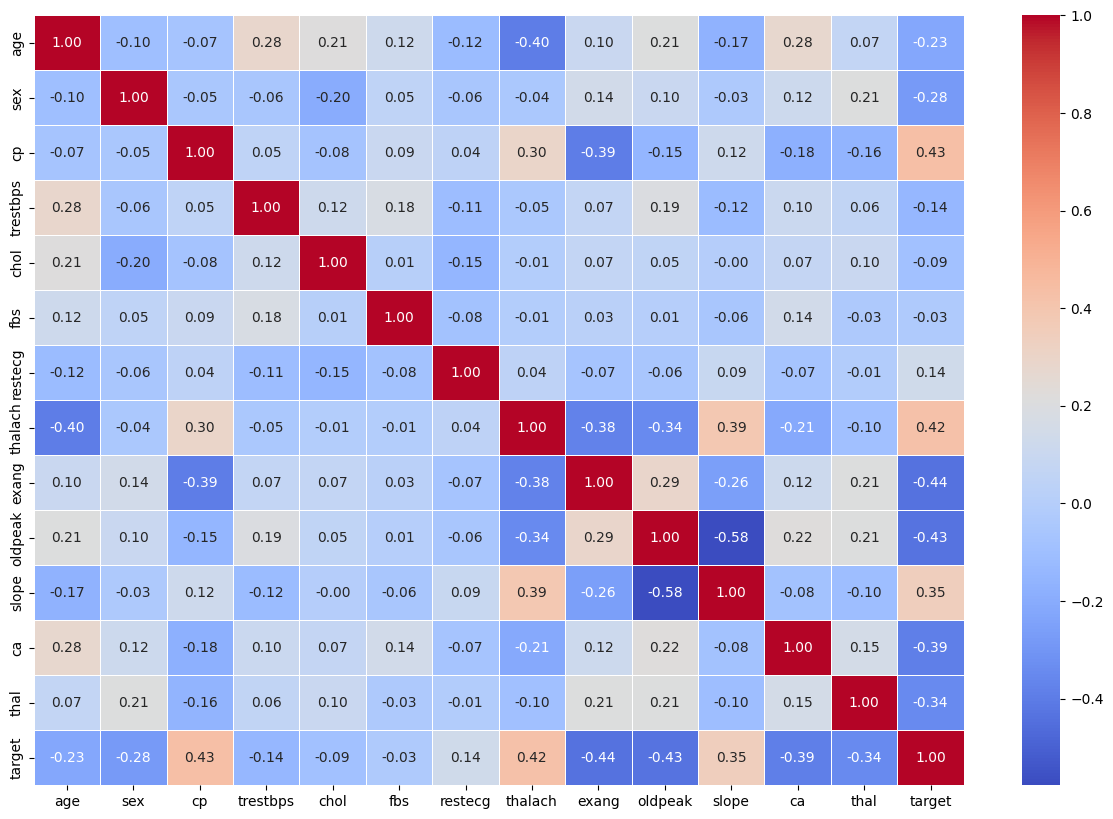

In [16]:
# Finding the corr between every independent variable 
corr_matrix = df.corr()
fig, ax = fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


## Modeling 

In [17]:
# Splitting our data into x and y 
x = df.drop('target', axis=1)
y = df['target']


In [18]:
# Splitting our data into test sample and train
np.random.seed(42)
x_train, x_test , y_train , y_test = train_test_split(x,
                                                      y, 
                                                      test_size=.2)

In [19]:
# Creating a function to train our model
models = {'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier()}
def fit_evaluate(models, x_train, x_test, y_train, y_test):
    """ 
    For fitting and evaluating models 
    models: the dictionary of models
    x_train: x_train sample
    x_test: x_test sample
    y_train: y_train sample
    y_test: y_test sample

    """
    np.random.seed(42)
    # Creating a dictionary to save the score in it
    accuracy = {} 
    # Looping throw the dictionary to fit all models and comparing each result
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Evaluate each score and save it in accuracy
        accuracy[name] = model.score(x_test, y_test)
    return accuracy
model_scores = fit_evaluate(models=models,
                            x_train= x_train,
                            y_train= y_train,
                            x_test= x_test,
                            y_test= y_test)
model_scores

        
        

C:\Users\mohammedsamir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Model compassion

<Axes: >

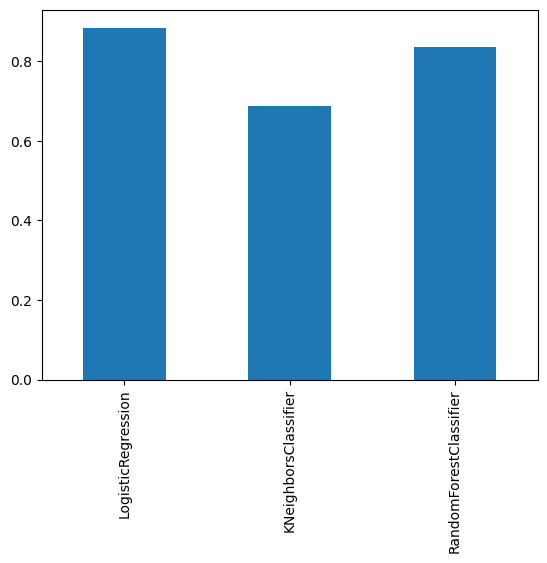

In [20]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot(kind='bar', legend=False)


## Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [21]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data: 75.41%


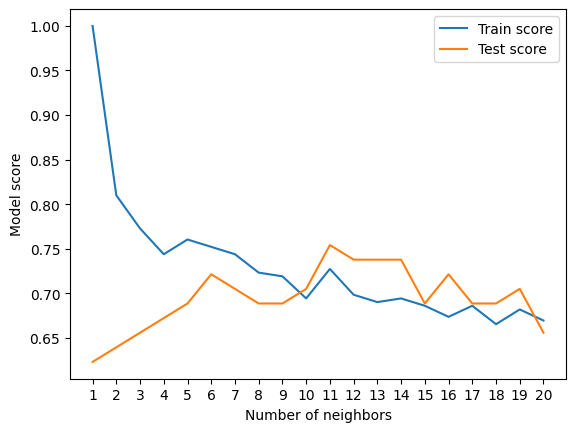

In [22]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [23]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(x_test, y_test)


0.8852459016393442

In [27]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [30]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy

In [33]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [34]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

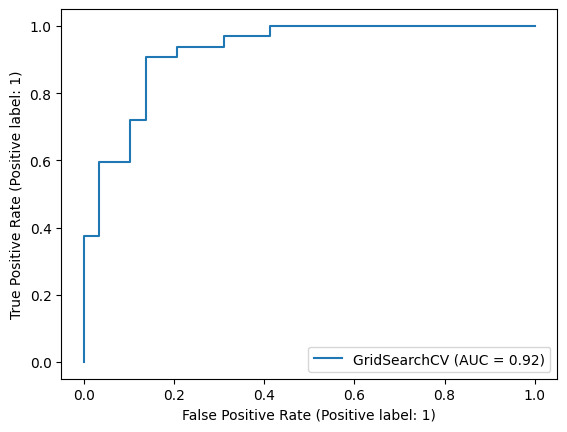

In [36]:
# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)


In [37]:
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


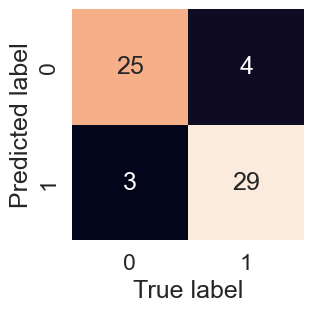

In [38]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [39]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [43]:
def run_model():
    try:
        # Get input values from the entry fields
        age = float(input_entries[0].get())
        sex = float(input_entries[1].get())
        cp = float(input_entries[2].get())
        trestbps = float(input_entries[3].get())
        chol = float(input_entries[4].get())
        fbs = float(input_entries[5].get())
        restecg = float(input_entries[6].get())
        thalach = float(input_entries[7].get())
        exang = float(input_entries[8].get())
        oldpeak = float(input_entries[9].get())
        slope = float(input_entries[10].get())
        ca = float(input_entries[11].get())
        thal = float(input_entries[12].get())

        # Prepare input for prediction
        input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

        # Predict using the model
        output = gs_log_reg.predict(input_data)

        # Update the output label
        output_label.config(text="Output: " + ("Disease Present" if output[0] == 1 else "Disease Absent"))
    except ValueError:
        messagebox.showerror("Error", "Invalid input! Please enter numeric values.")

In [106]:
import tkinter as tk

def open_main_window():
    main_window = tk.Toplevel()
    main_window.title("Heart Disease Prediction")
    main_window.configure(bg="#f0f0f0")
    main_window.geometry("500x525")

    # Create a label with information about the features
    features_info = """
        Features Information:
        1. Age (in years)
        2. Sex (1 = male; 0 = female)
        3. Chest Pain Type
            0: Typical angina
            1: Atypical angina
            2: Non-anginal pain
            3: Asymptomatic
        4. Resting Blood Pressure (mm Hg)
        5. Cholesterol (mg/dl)
        6. Fasting Blood Sugar (> 120 mg/dl) (1 = true; 0 = false)
        7. Resting Electrocardiographic Results
            0: Nothing to note
            1: ST-T Wave abnormality
            2: Possible or definite left ventricular hypertrophy
        8. Maximum Heart Rate Achieved
        9. Exercise Induced Angina (1 = yes; 0 = no)
        10. ST Depression Induced by Exercise Relative to Rest
        11. Slope of the Peak Exercise ST Segment
            0: Upsloping
            1: Flatsloping
            2: Downsloping
        12. Number of Major Vessels (0-3) Colored by Fluoroscopy
        13. Thalium Stress Result
            1,3: Normal
            6: Fixed Defect
            7: Reversible Defect
    """

    info_label = tk.Label(main_window, text=features_info, justify="left", bg="#f0f0f0", fg="#333333", font=("Helvetica", 12), padx=20, pady=20)
    info_label.pack(expand=True, fill=tk.BOTH)

def run_model():
    # Code for running the model goes here
    pass

def open_prediction_window():
    prediction_window = tk.Toplevel()
    prediction_window.title("Heart Disease Prediction")
    prediction_window.configure(bg="#f0f0f0")
    prediction_window.geometry("450x700")

    # Create input entry fields with associated labels
    input_entries = []
    features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
    for i, feature in enumerate(features):
        label = tk.Label(prediction_window, text=feature.capitalize() + ":", bg="#f0f0f0", fg="#333333", font=("Helvetica", 12, "bold"))
        label.grid(row=i, column=0, padx=20, pady=10, sticky="e")
        entry = tk.Entry(prediction_window, bg="#ffffff", fg="#333333", font=("Helvetica", 12))
        entry.grid(row=i, column=1, padx=20, pady=10, sticky="w")
        input_entries.append(entry)

    # Create button to run the model
    run_button = tk.Button(prediction_window, text="Predict", command=run_model, bg="#007bff", fg="#ffffff", font=("Helvetica", 12, "bold"), bd=0)
    run_button.grid(row=len(features), column=0, columnspan=2, pady=20)

    # Create output label
    output_label = tk.Label(prediction_window, text="Output:", bg="#f0f0f0", fg="#333333", font=("Helvetica", 12, "bold"))
    output_label.grid(row=len(features) + 1, column=0, columnspan=2)

    prediction_window.mainloop()

# Create the main application window
app = tk.Tk()
app.title("Heart Disease Prediction")
app.configure(bg="#f0f0f0")
app.geometry("500x150")

# Button to open prediction window
open_prediction_button = tk.Button(app, text="Open Prediction Window", command=open_prediction_window, bg="#007bff", fg="#ffffff", font=("Helvetica", 14, "bold"), bd=0)
open_prediction_button.pack(pady=20)

# Button to open information window
open_info_button = tk.Button(app, text="Open Information Window", command=open_main_window, bg="#007bff", fg="#ffffff", font=("Helvetica", 14, "bold"), bd=0)
open_info_button.pack(pady=20)

app.mainloop()

